## XOR

In [2]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name="weight") #input 2개, output 1개
b = tf.Variable(tf.random_normal([1]), name="bias") #output 1개

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, w_val = sess.run(
                  [train, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        if step % 1000 == 0:
            print(step, cost_val, w_val)

    # Accuracy report
    h, c, a = sess.run(
              [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.83531475 [[ 2.1387315 ]
 [-0.07139942]]
1000 0.6931792 [[0.02399814]
 [0.01955721]]
2000 0.69314724 [[0.00043167]
 [0.00042325]]
3000 0.6931471 [[8.372632e-06]
 [8.361485e-06]]
4000 0.6931472 [[1.6357401e-07]
 [1.6285830e-07]]
5000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]
6000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]
7000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]
8000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]
9000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]
10000 0.6931472 [[8.9068074e-08]
 [8.8352358e-08]]

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


## XOR using NN

In [3]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.7479743
1000 0.667229
2000 0.59754974
3000 0.5456026
4000 0.52149177
5000 0.50913906
6000 0.5019066
7000 0.49723378
8000 0.49399388
9000 0.49162757
10000 0.48982972

Hypothesis:
[[0.34506622]
 [0.9856366 ]
 [0.3299556 ]
 [0.33822256]] 
Predicted:
[[0.]
 [1.]
 [0.]
 [0.]] 
Accuracy:
0.75


## XOR using DNN

In [4]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.8875428
1000 0.62395865
2000 0.06673364
3000 0.021042474
4000 0.011745542
5000 0.007977846
6000 0.0059787175
7000 0.004752237
8000 0.0039280853
9000 0.0033385232
10000 0.0028970996

Hypothesis:  [[0.00310349]
 [0.9964462 ]
 [0.9977044 ]
 [0.00261679]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


## MNIST example

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.153186729
Epoch: 0002, Cost: 0.853815257
Epoch: 0003, Cost: 0.637000597
Epoch: 0004, Cost: 0.506048433
Epoch: 0005, Cost: 0.426731677
Epoch: 0006, Cost: 0.365449496
Epoch: 0007, Cost: 0.318628436
Epoch: 0008, Cost: 0.281520548
Epoch: 0009, Cost: 0.251903456
Epoch: 0010, Cost: 0.224970677
Epoch: 0011, Cost: 0.203433670
Epoch: 0012, Cost: 0.184206534
Epoch: 0013, Cost: 0.167096152
Epoch: 0014, Cost: 0.153579152
Epoch: 0015, Cost: 0.140070145
Epoch: 0016, Cost: 0.128477858
Epoch: 0017, Cost: 0.118235659
Epoch: 0018, Cost: 0.109294975
Epoch: 0019, Cost: 0.100662102
Epoch: 0020, Cost: 0.093049968
Learning finished
Accuracy:  0.8671
Label:  [9]
Prediction:  [9]


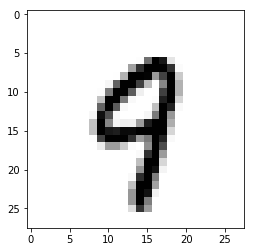

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 500]), name='weight1')
b1 = tf.Variable(tf.random_normal([500]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([500, 500]), name='weight2')
b2 = tf.Variable(tf.random_normal([500]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([500, 500]), name='weight3')
b3 = tf.Variable(tf.random_normal([500]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([500, 500]), name='weight4')
b4 = tf.Variable(tf.random_normal([500]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([500, nb_classes]))
b5 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.nn.softmax(tf.matmul(layer4, W5) + b5)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

## Tensorboard

In [12]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)


with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, summary, cost_val = sess.run(
            [train, merged_summary, cost], feed_dict={X: x_data, Y: y_data}
        )
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

InvalidArgumentError: You must feed a value for placeholder tensor 'y_6' with dtype float and shape [?,1]
	 [[node y_6 (defined at <ipython-input-11-5c7b0611d4fd>:7) ]]
	 [[node Layer2_4/weight_2/read (defined at <ipython-input-10-1edfc91b7896>:20) ]]

Caused by op 'y_6', defined at:
  File "D:\Anaconda3\envs\tutorial\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda3\envs\tutorial\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "D:\Anaconda3\envs\tutorial\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "D:\Anaconda3\envs\tutorial\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "D:\Anaconda3\envs\tutorial\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-5c7b0611d4fd>", line 7, in <module>
    Y = tf.placeholder(tf.float32, [None, 1], name="y")
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "D:\Anaconda3\envs\tutorial\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'y_6' with dtype float and shape [?,1]
	 [[node y_6 (defined at <ipython-input-11-5c7b0611d4fd>:7) ]]
	 [[node Layer2_4/weight_2/read (defined at <ipython-input-10-1edfc91b7896>:20) ]]
